<a href="https://colab.research.google.com/github/rxdiohex/UAS-Data-Mining-Stunting/blob/main/UAS_Data_Mining_Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install swifter

In [2]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2021-12-19 18:52:05--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py.2’

taudataDDGsna.py.2  100%[===================>]   7.84K  --.-KB/s    in 0s      

2021-12-19 18:52:05 (77.7 MB/s) - ‘taudataDDGsna.py.2’ saved [8030/8030]

--2021-12-19 18:52:05--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (

In [3]:
import taudataDDGsna as taudata
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import graphviz
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import random, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


'Done'

In [4]:
Ck = 'iPEpadFQIZOFBVV298gv7B0Dn' # consumer_key
Cs = 'YkZWe2oMX1AIBoBeeMWQd6mXbXw0DGJrwlsml6uQ9WIx7B6QgD' # consumer_secret
At = '1147475558990675968-nuDEy7aZVQgo3MOdEzDNTJbQyxLYDm' # access_token
As = 'uje1iu33BPqsKaeeylUVOaVhaOrNNtV4RRd37by1gJJgr' # access_secret

'Done'

'Done'

In [5]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=20000, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Bukut" you are now connected to twitter server


In [6]:
qry = '"balita pendek" OR Stunting OR "kurang gizi" OR Pengerdilan OR "terlambat tumbuh" OR "Gagal tumbuh pada anak" OR "Gagal Tumbuh" OR dwarfisme'
N = 20000 # jumlah stunting OR kerdil OR dwarfisme N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

1314it [00:28, 46.07it/s]


'Done'

In [7]:
# T bukan sekedar list of tweets 
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1314 tweets


In [8]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Sun Dec 19 18:47:36 +0000 2021',
 'Tantawi Anggota DPR Aceh/ Ketua DPC @demokrat_autara Kunjungi Anak Kurang Gizi di Lhoksukon. @AgusYudhoyono @PDemokrat  @Demokrat_TV https://t.co/IjDhWm6uDk via @NukilanID')

In [9]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "demokrat_autara" : "Tantawi Anggota DPR Aceh/ Ketua DPC @demokrat_autara Kunjungi Anak Kurang Gizi di Lhoksukon. @AgusYudhoyono @PDemokrat  @Demokrat_TV https://t.co/IjDhWm6uDk via @NukilanID"


In [10]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [11]:
# Meyimpan hasil crawling twitter
fileName = 'Tweets_Stunting.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_Stunting.json


In [12]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
# Sengaja nama variabelnya saya bedakan (T2)
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "demokrat_autara" : "Tantawi Anggota DPR Aceh/ Ketua DPC @demokrat_autara Kunjungi Anak Kurang Gizi di Lhoksukon. @AgusYudhoyono @PDemokrat  @Demokrat_TV https://t.co/IjDhWm6uDk via @NukilanID"


In [13]:
T2 = loadTweets(file=fileName)
df = pd.DataFrame(T2)

In [14]:
print(df)

                          created_at  ...  quoted_status
0     Sun Dec 19 18:47:36 +0000 2021  ...            NaN
1     Sun Dec 19 18:28:09 +0000 2021  ...            NaN
2     Sun Dec 19 17:56:00 +0000 2021  ...            NaN
3     Sun Dec 19 17:21:11 +0000 2021  ...            NaN
4     Sun Dec 19 16:45:36 +0000 2021  ...            NaN
...                              ...  ...            ...
1309  Sat Dec 11 06:45:40 +0000 2021  ...            NaN
1310  Sat Dec 11 06:45:39 +0000 2021  ...            NaN
1311  Sat Dec 11 06:45:39 +0000 2021  ...            NaN
1312  Sat Dec 11 06:19:23 +0000 2021  ...            NaN
1313  Sat Dec 11 06:15:00 +0000 2021  ...            NaN

[1314 rows x 31 columns]


In [15]:
df.to_csv

<bound method NDFrame.to_csv of                           created_at  ...  quoted_status
0     Sun Dec 19 18:47:36 +0000 2021  ...            NaN
1     Sun Dec 19 18:28:09 +0000 2021  ...            NaN
2     Sun Dec 19 17:56:00 +0000 2021  ...            NaN
3     Sun Dec 19 17:21:11 +0000 2021  ...            NaN
4     Sun Dec 19 16:45:36 +0000 2021  ...            NaN
...                              ...  ...            ...
1309  Sat Dec 11 06:45:40 +0000 2021  ...            NaN
1310  Sat Dec 11 06:45:39 +0000 2021  ...            NaN
1311  Sat Dec 11 06:45:39 +0000 2021  ...            NaN
1312  Sat Dec 11 06:19:23 +0000 2021  ...            NaN
1313  Sat Dec 11 06:15:00 +0000 2021  ...            NaN

[1314 rows x 31 columns]>

In [16]:
df.isnull().sum()

created_at                      0
id                              0
id_str                          0
full_text                       0
truncated                       0
display_text_range              0
entities                        0
metadata                        0
source                          0
in_reply_to_status_id         915
in_reply_to_status_id_str     915
in_reply_to_user_id           915
in_reply_to_user_id_str       915
in_reply_to_screen_name       915
user                            0
geo                          1314
coordinates                  1314
place                        1298
contributors                 1314
is_quote_status                 0
retweet_count                   0
favorite_count                  0
favorited                       0
retweeted                       0
possibly_sensitive            676
lang                            0
extended_entities            1060
retweeted_status             1072
quoted_status_id             1230
quoted_status_

In [17]:
df.drop(['geo', 'coordinates', 'place', 'contributors', 'contributors', 'is_quote_status', 
         'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
         'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'retweeted_status', 'extended_entities','retweeted_status'], axis='columns', inplace=True)

In [18]:
df.drop('truncated', axis='columns', inplace=True)

In [19]:
df.drop(['favorited', 'retweeted', 'possibly_sensitive'], axis='columns', inplace=True)

In [20]:
print(df.head())

                       created_at                   id  ... favorite_count lang
0  Sun Dec 19 18:47:36 +0000 2021  1472639772380196864  ...              0   in
1  Sun Dec 19 18:28:09 +0000 2021  1472634878575271938  ...              0   in
2  Sun Dec 19 17:56:00 +0000 2021  1472626786555027468  ...              1   in
3  Sun Dec 19 17:21:11 +0000 2021  1472618025064886282  ...              0   in
4  Sun Dec 19 16:45:36 +0000 2021  1472609067344404483  ...              0   in

[5 rows x 12 columns]


In [21]:
df['day'] = df['created_at'].str[:3]
df['date'] = df['created_at'].str[4:10]
df['year'] = df['created_at'].str[26:30]
df['hour'] = df['created_at'].str[12:19]

In [22]:
print(df['hour'].head())

0    8:47:36
1    8:28:09
2    7:56:00
3    7:21:11
4    6:45:36
Name: hour, dtype: object


In [23]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df['full_text'] = df['full_text'].str.lower()


print('Case Folding Result : \n')
print(df['full_text'].head())
print('\n\n\n')

Case Folding Result : 

0    tantawi anggota dpr aceh/ ketua dpc @demokrat_...
1                           @convomf singa kurang gizi
2    @yntktgs @maharanisaa_ @dewsbanisters @infotwi...
3    @sutanmadu @alie_fahnoor ya saya kurang gizi,m...
4    rt @ayang_utriza: @tbanjarry @makmun_rasyid @p...
Name: full_text, dtype: object






In [24]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['full_text'] = df['full_text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['full_text'] = df['full_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['full_text'] = df['full_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['full_text'] = df['full_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['full_text'] = df['full_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['full_text'] = df['full_text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tweet_tokens'] = df['full_text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['tweet_tokens'].head())
print('\n\n\n')

<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence \w
<input>:16: DeprecationWarning: invalid escape sequence 

Tokenizing Result : 

0    [tantawi, anggota, dpr, aceh, ketua, dpc, auta...
1                                [singa, kurang, gizi]
2    [ini, lah, sodara, sodara, akibat, stunting, u...
3    [fahnoor, ya, saya, kurang, gizimiskinalhamdul...
4    [rt, utriza, rasyid, tni, polri, anak, itu, su...
Name: tweet_tokens, dtype: object






In [25]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

df['tweet_tokens_fdist'] = df['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tantawi, 1), (anggota, 1), (dpr, 1), (aceh, ...
1                 [(singa, 1), (kurang, 1), (gizi, 1)]
2    [(sodara, 2), (ini, 1), (lah, 1), (akibat, 1),...
3    [(fahnoor, 1), (ya, 1), (saya, 1), (kurang, 1)...
4    [(thamrin, 2), (rt, 1), (utriza, 1), (rasyid, ...
Name: tweet_tokens_fdist, dtype: object


In [26]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['tweet_tokens_WSW'] = df['tweet_tokens'].apply(stopwords_removal) 


print(df['tweet_tokens_WSW'].head())

0    [tantawi, anggota, dpr, aceh, ketua, dpc, auta...
1                                        [singa, gizi]
2    [sodara, sodara, akibat, stunting, udah, kejad...
3    [fahnoor, ya, gizimiskinalhamdulillah, jualbel...
4    [rt, utriza, rasyid, tni, polri, anak, diadili...
Name: tweet_tokens_WSW, dtype: object


In [27]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['tweet_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['tweet_tokens_WSW'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/numba/core/types/__init__.py:108: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event y

3864
------------------------
tantawi : tantawi
anggota : anggota
dpr : dpr
aceh : aceh
ketua : ketua
dpc : dpc
autara : autara
kunjungi : kunjung
anak : anak
gizi : gizi
lhoksukon : lhoksukon
tv : tv
via : via
singa : singa
sodara : sodara
akibat : akibat
stunting : stunting
udah : udah
kejadian : jadi
sibuk : sibuk
koreksi : koreksi
korban : korban
gak : gak
bahas : bahas
keanjingan : anjing
pelakunya : laku
gmn : gmn
supays : supays
bs : bs
diadili : adil
fahnoor : fahnoor
ya : ya
gizimiskinalhamdulillah : gizimiskinalhamdulillah
jualbeli : jualbeli
barang : barang
mahal : mahal
rt : rt
utriza : utriza
rasyid : rasyid
tni : tni
polri : polri
dipenjara : penjara
thamrin : thamrin
malammalam : malammalam
tibatiba : tibatiba
keinget : keinget
bundaran : bundar
rumah : rumah
baliho : baliho
dinkes : dinkes
hindari : hindar
cebol : cebol
samping : samping
tulisannya : tulis
foto : foto
gubernur : gubernur
senyum : senyum
fyi : fyi
tingginya : tinggi
nggk : nggk
soul : soul
tshah : tshah


Pandas Apply:   0%|          | 0/1314 [00:00<?, ?it/s]

In [28]:
df['tweet_tokens_stemmed'].to_csv("Text_Preprocessing.csv")

In [29]:
df1=pd.read_csv("Text_Preprocessing.csv")
print(df1)

      Unnamed: 0                               tweet_tokens_stemmed
0              0  ['tantawi', 'anggota', 'dpr', 'aceh', 'ketua',...
1              1                                  ['singa', 'gizi']
2              2  ['sodara', 'sodara', 'akibat', 'stunting', 'ud...
3              3  ['fahnoor', 'ya', 'gizimiskinalhamdulillah', '...
4              4  ['rt', 'utriza', 'rasyid', 'tni', 'polri', 'an...
...          ...                                                ...
1309        1309  ['ketua', 'dprd', 'kota', 'tangerang', 'gatot'...
1310        1310  ['dprd', 'kota', 'tangerang', 'dorong', 'kader...
1311        1311  ['dprd', 'dorong', 'sukses', 'program', 'kelua...
1312        1312  ['cegah', 'cepat', 'turun', 'angka', 'stunting...
1313        1313  ['aktif', 'tangan', 'stunting', 'sehat', 'seha...

[1314 rows x 2 columns]


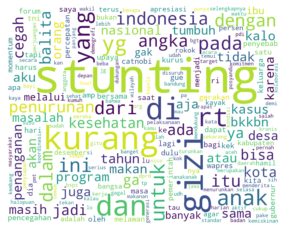

In [31]:
from wordcloud import WordCloud

word_cloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False).generate(' '.join(df['full_text']))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

                                                    created_at  ...  tweet_tokens_stemmed
full_text                                                       ...                      
 berapa bb mu  kg kenapa  dehhh saya kg ji  oh ...           1  ...                     1
 can relate lenganku kecil banget sampe dikira ...           1  ...                     1
 di feb ui  di edinburgh asisten peneliti demog...           1  ...                     1
 news namawe wldn katanya kurang gizi jd harus ...           1  ...                     1
 news namawe wldn kurang gizi                                1  ...                     1
...                                                        ...  ...                   ...
yg satu obesitas eh yg ini malah kurang gizi se...           1  ...                     1
yk ngapunten njih dadosipun mendeme dikelarke r...           1  ...                     1
yok makan siang jangan sampe gak makan ntar mal...           1  ...                     1
yuk bergab

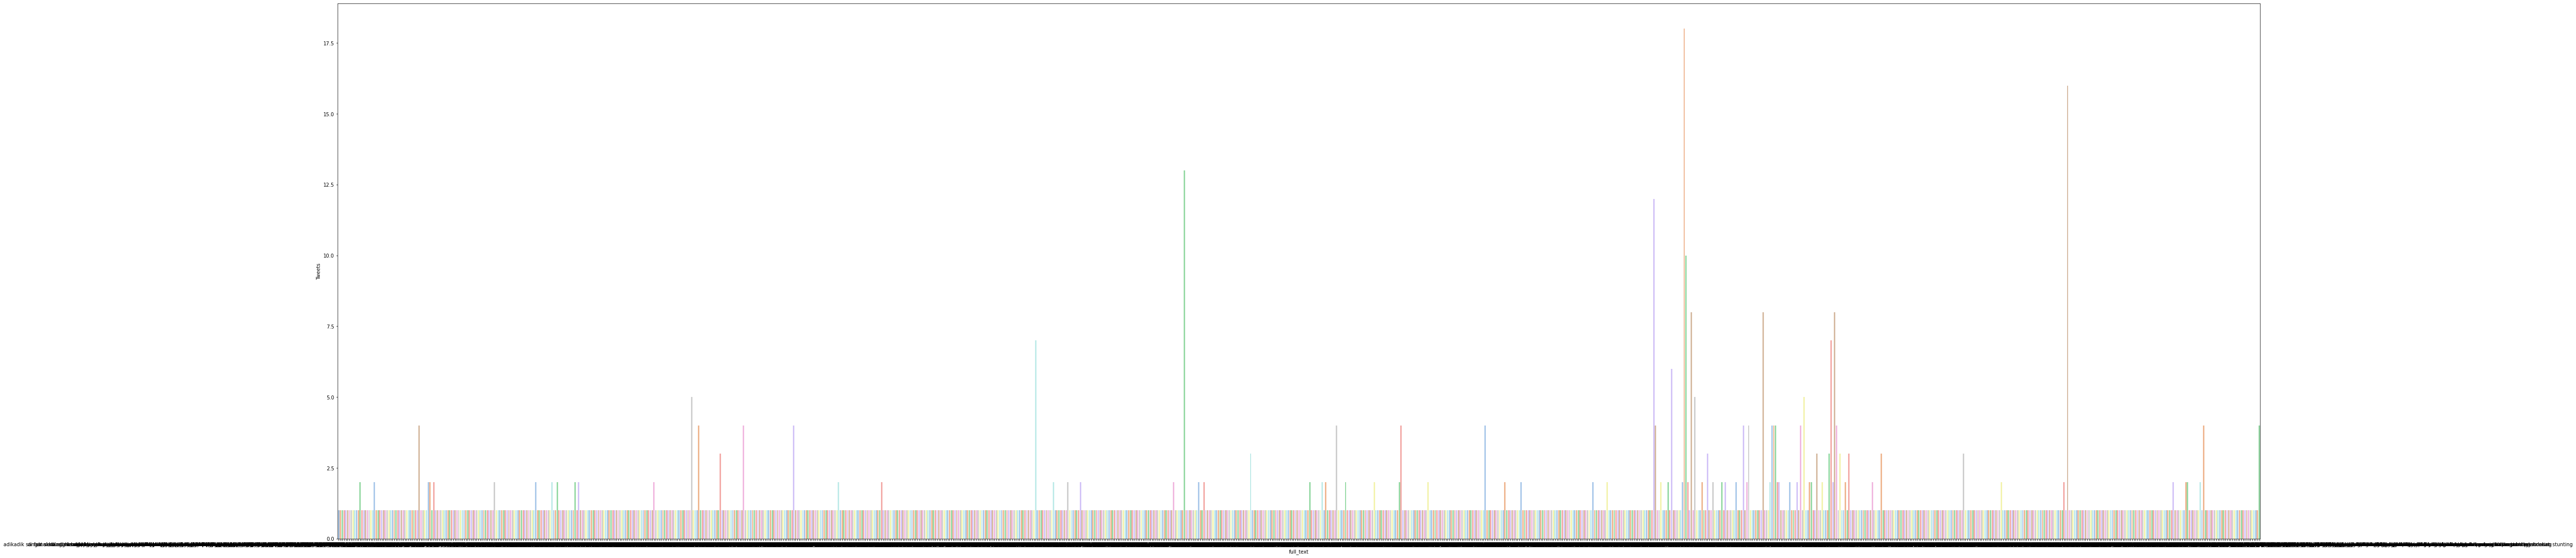

In [32]:
visualisasi_data = df.groupby('full_text').count()
print(visualisasi_data)
visualisasi_data.reset_index(inplace=True)
plt.figure(figsize=(70,20))
sns.barplot(x='full_text', y='retweet_count', data=visualisasi_data, palette="pastel")
plt.ylabel("Tweets")
plt.show()

                                                    created_at  ...  tweet_tokens_stemmed
full_text                                                       ...                      
 berapa bb mu  kg kenapa  dehhh saya kg ji  oh ...           1  ...                     1
 can relate lenganku kecil banget sampe dikira ...           1  ...                     1
 di feb ui  di edinburgh asisten peneliti demog...           1  ...                     1
 news namawe wldn katanya kurang gizi jd harus ...           1  ...                     1
 news namawe wldn kurang gizi                                1  ...                     1
...                                                        ...  ...                   ...
yg satu obesitas eh yg ini malah kurang gizi se...           1  ...                     1
yk ngapunten njih dadosipun mendeme dikelarke r...           1  ...                     1
yok makan siang jangan sampe gak makan ntar mal...           1  ...                     1
yuk bergab

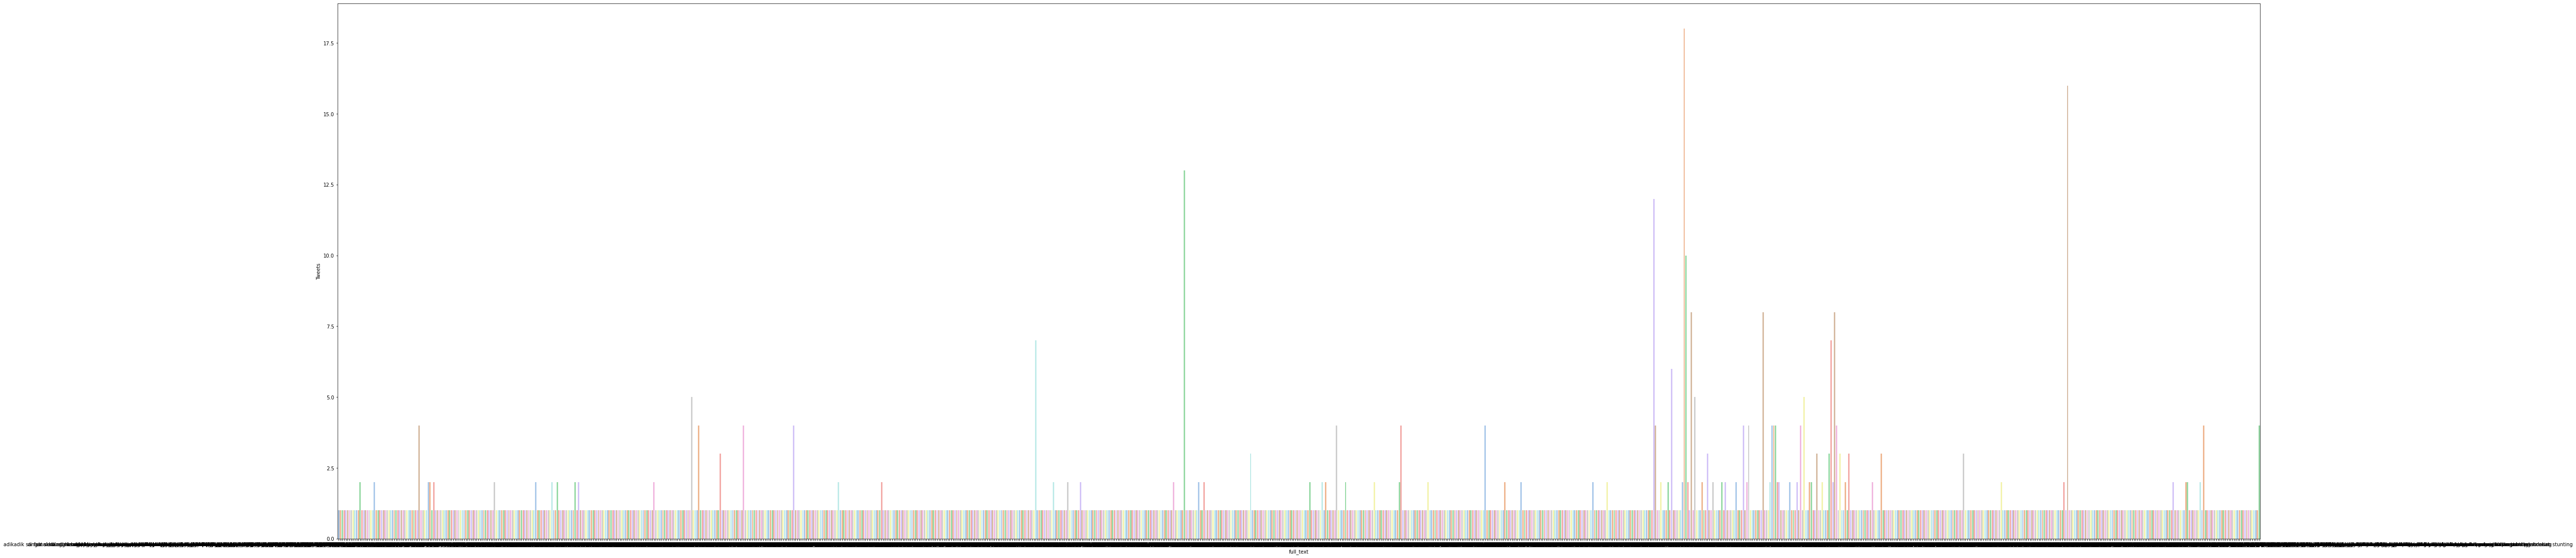

In [33]:
visualisasi_data = df.groupby('full_text').count()
print(visualisasi_data)
visualisasi_data.reset_index(inplace=True)
plt.figure(figsize=(70,20))
sns.barplot(x='full_text', y='favorite_count', data=visualisasi_data, palette="pastel")
plt.ylabel("Tweets")
plt.show()